# **Week 2: Numerical Data Summaries**

```
.------------------------------------.
|   __  ____  ______  _  ___ _____   |
|  |  \/  \ \/ / __ )/ |/ _ \___  |  |
|  | |\/| |\  /|  _ \| | | | | / /   |
|  | |  | |/  \| |_) | | |_| |/ /    |
|  |_|  |_/_/\_\____/|_|\___//_/     |
'------------------------------------'

```


This week, we will explore basic summary statistics for numerical data and demonstrate how to compute them in R. If you are not familiar with R programming, please take some time to review [Week 0](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_0.ipynb) and [Week 1](https://colab.research.google.com/github/edelweiss611428/MXB107-Notebooks/blob/main/notebooks/Week_1.ipynb) content.

## **Pre-Configurating the Notebook**

### **Switching to the R Kernel on Colab**

By default, Google Colab uses Python as its programming language. To use R instead, you’ll need to manually switch the kernel by going to **Runtime > Change runtime type**, and selecting R as the kernel. This allows you to run R code in the Colab environment.

However, our notebook is already configured to use R by default. Unless something goes wrong, you shouldn’t need to manually change runtime type.

### **Importing Required Datasets and Packages**
**Run the following lines of code**:

In [1]:
#Do not modify

setwd("/content")

# Remove `MXB107-Notebooks` if exists,
if (dir.exists("MXB107-Notebooks")) {
  system("rm -rf MXB107-Notebooks")
}

# Fork the repository
system("git clone https://github.com/edelweiss611428/MXB107-Notebooks.git")

# Change working directory to "MXB107-Notebooks"
setwd("MXB107-Notebooks")

#
invisible(source("R/preConfigurated.R"))

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: stringr

Loading required package: magrittr


Attaching package: ‘magrittr’


The following object is masked from ‘package:tidyr’:

    extract


Loading required package: IRdisplay

Loading required package: png

Loading required package: grid



**Do not modify the following**

In [2]:
if (!require("testthat")) install.packages("testthat"); library("testthat")

test_that("Test if all packages have been loaded", {

  expect_true(all(c("ggplot2", "tidyr", "dplyr", "stringr", "magrittr", "IRdisplay", "png") %in% loadedNamespaces()))

})

test_that("Test if all utility functions have been loaded", {
  expect_true(exists("skewness"))
  expect_true(exists("kurtosis"))
  expect_true(exists("Mode"))
  expect_true(exists("FDbinning"))
  expect_true(exists("ModeBinMidpoint"))
  expect_true(exists("empiricalRuleGaussian"))
  expect_true(exists("chebyshevRule"))
  expect_true(exists("rangeBasedSD"))
  expect_true(exists("IQRBasedSD"))
  expect_true(exists("boxPlotDescribe"))
})

Loading required package: testthat


Attaching package: ‘testthat’


The following objects are masked from ‘package:magrittr’:

    equals, is_less_than, not


The following object is masked from ‘package:tidyr’:

    matches


The following object is masked from ‘package:dplyr’:

    matches




Test passed 🌈
Test passed 🥳


## **Classification of Data**


This is a diagram of data types.

In [3]:
svgCode = paste(readLines("figures/classif_of_data.svg", warn = F), collapse = "\n")
display_html(svgCode)

<path d="M73.98185324367088,276.5L137.98922034608407,149.51500958610907Q142.28125,141 151.81681011997318,141L168.4609375,141" id="L_A_C_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 167.06260681152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_C_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjI3Ni41fSx7IngiOjE0Mi4yODEyNSwieSI6MTQxfSx7IngiOjE3Mi40NjA5Mzc1LCJ5IjoxNDF9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M73.98185324367088,321.5L137.98922034608407,448.48499041389096Q142.28125,457 151.81681011997318,457L163.28125,457" id="L_A_B_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 161.88291931152344 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_A_B_0" data-points="W3sieCI6NzMuOTgxODUzMjQzNjcwODgsInkiOjMyMS41fSx7IngiOjE0Mi4yODEyNSwieSI6NDU3fSx7IngiOjE2Ny4yODEyNSwieSI6NDU3fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,118.5L296.4437170904412,69.33885500932236Q303.953125,62 314.453125,62L324.953125,62" id="L_C_G_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_G_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxMTguNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo2Mn0seyJ4IjozMjguOTUzMTI1LCJ5Ijo2Mn1d" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,163.5L296.4437170904412,212.66114499067763Q303.953125,220 314.453125,220L324.953125,220" id="L_C_F_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80984497070312 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_C_F_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5IjoxNjMuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjoyMjB9LHsieCI6MzI4Ljk1MzEyNSwieSI6MjIwfV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,434.5L296.4437170904412,385.33885500932234Q303.953125,378 314.453125,378L324.953125,378" id="L_B_E_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.8098373413086 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_E_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0MzQuNX0seyJ4IjozMDMuOTUzMTI1LCJ5IjozNzh9LHsieCI6MzI4Ljk1MzEyNSwieSI6Mzc4fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M246.14008109177215,479.5L296.4437170904412,528.6611449906776Q303.953125,536 314.453125,536L324.953125,536" id="L_B_D_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 91.80985260009766 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_B_D_0" data-points="W3sieCI6MjQ2LjE0MDA4MTA5MTc3MjE1LCJ5Ijo0NzkuNX0seyJ4IjozMDMuOTUzMTI1LCJ5Ijo1MzZ9LHsieCI6MzI4Ljk1MzEyNSwieSI6NTM2fV0=" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/> Data Types Numerical Categorical Continuous Examples: Weight, height, room temperature, time Discrete Examples: Number of children, dice rolls Ordinal Examples: Education level, satisfaction rating (1-5) Nominal Examples: Gender, color, country, suburb

As you go lower in the diagram, the data types become more specific but also a bit more limited — they carry less detailed information and support fewer types of analysis, and you can do fewer kinds of analysis on them.

We’ll focus exclusively on numerical data in this unit. It is by far the most common type encountered in data analysis tasks. Categorical data will be briefly touched on in later workshops.

## **Statistical Inference**

This diagram illustrates the fundamental process in statistics:

- We first start with a population, which is the entire set of items, individuals, or events we want to study. (e.g., all QUT students).

- Since it is often impractical or impossible to collect data on the entire population, we only draw a random sample from the population. (e.g., randomly select 100 QUT students).

- We then analyse the sample data and make statistical inferences (conclusions) about the larger population (e.g., average GPA).

This process is the core of statistical inference — using limited data to learn about a much larger group. If we did have access to the whole population, statistical inference would be unnecessary because we would already know all the information.

In [4]:
svgCode = paste(readLines("figures/inference.svg", warn = F), collapse = "\n")
display_html(svgCode)

<path d="M181.7,74L113,136.45454545454547Q108,141 113,145.54545454545453L178.74023970641622,205.30930882401475" id="L_Population_Sample_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 183.37522888183594 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_Population_Sample_0" data-points="W3sieCI6MTgxLjcsInkiOjc0fSx7IngiOjEwOCwieSI6MTQxfSx7IngiOjE4MS43LCJ5IjoyMDh9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/><path d="M254.3,208L323,145.54545454545453Q328,141 323,136.45454545454547L257.2597602935838,76.69069117598525" id="L_Sample_Population_0" class="edge-thickness-normal edge-pattern-solid edge-thickness-normal edge-pattern-solid flowchart-link" style="stroke-dasharray: 0 0 183.375244140625 9; stroke-dashoffset: 0;;" data-edge="true" data-et="edge" data-id="L_Sample_Population_0" data-points="W3sieCI6MjU0LjMsInkiOjIwOH0seyJ4IjozMjgsInkiOjE0MX0seyJ4IjoyNTQuMywieSI6NzR9XQ==" marker-end="url(#export-svg_flowchart-v2-pointEnd-margin)"/> Draw a sample from the population (collect GPAs from students) Use sample GPAs to estimate average GPA of all students (infer population mean) Population: QUT students (≈52,000 students) Sample: 100 randomly selected students

Having introduced the basic concepts of statistical inference, we now focus on the most fundamental tools  — **summary statistics**. These statistics describe important features of the sample data and provide essential information for drawing inferences about the population.including:

- What is the central or typical value of the data? *(e.g., What is the average GPA of QUT students?)*
- How much variability or dispersion exists within the data? *(e.g., How widely do GPAs vary among QUT students?)*
- Are there any data points that deviate markedly from the rest? *(e.g., Are there students with unusually low or high GPAs compared to their peers?)*

We will call these the three measures of summary statistics, namely:

- Measures of central tendency — statistics that describe the center or typical value of the data (e.g., mean, median, mode).
- Measures of variability — statistics that describe the spread or dispersion of the data (e.g., variance, standard deviation, interquartile range).
- Measures of shape — statistics that describe the distribution form of the data (e.g., skewness, kurtosis).

## **Measures of Central Tendency**

### **Dataset**

We will load a simulated dataset with 4 variables, each having 100 observations (with/without outliers). The non-outlier observations are generated from a standard Gaussian distribution. However, the magnitude of the outlying values increases across the variables. Here, the outliers are positive.

In [5]:
X = read.csv("./datasets/centraltendency")

First, we will use boxplots to visualise the data and get an overview of its distribution and potential outliers. We will return later to explain in detail what the various components of a boxplot represent.

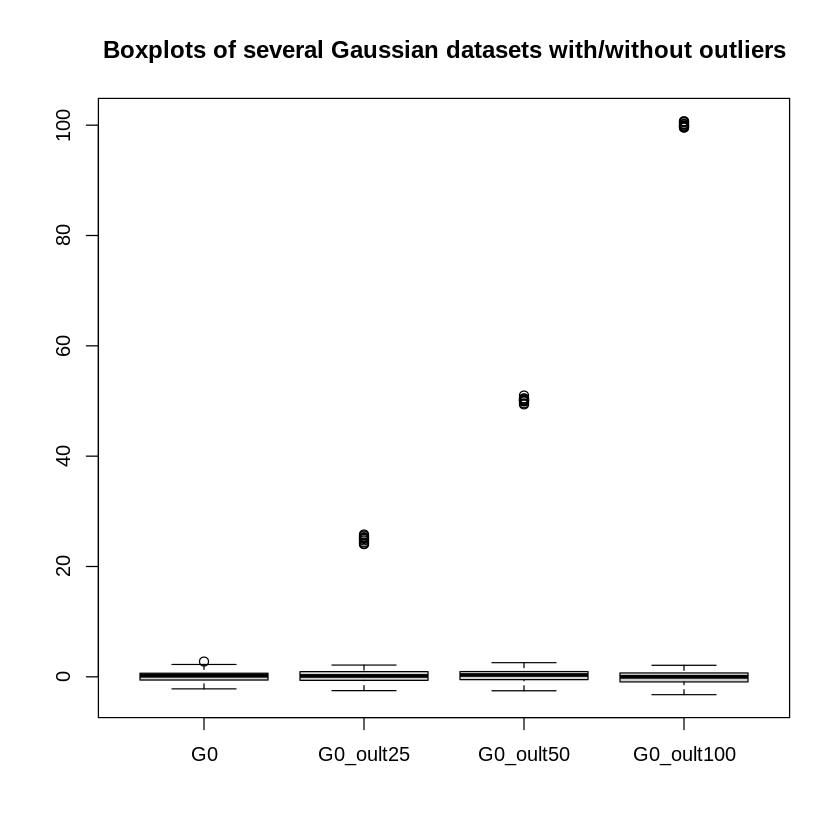

In [6]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

The majority of the data in each variable lie around 0. However, we observe that the magnitude of the outliers increases across variables, from 0 to 100. We expect a *good* measure of central tendency to reflect the typical values accurately even in the presence of these outliers.

Note that `ggplot2` is great, but not always necessary. In many cases, base R plots can achieve much of the same functionality — they might just look a bit "uglier." We will explore how to create boxplots in `ggplot2` in later sections.

### **Arithmetic Mean**


The arithmetic mean is the sum of all data values divided by the number of values. It represents the "average" value of a dataset and is a common measure of central tendency.

$$
\text{Mean}(x_1, \dots, x_n) \equiv \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i,
$$
where $\{x_i\}_{i=1}^n$ denotes the sample of $n$ observations.

#### **Properties of Arithmetic Mean**  
- In the absence of outliers, the arithmetic mean is an efficient and unbiased estimator of the population mean; its accuracy improves as the sample size increases.
- Unfortunately, the arithmetic mean is sensitive to outliers and extreme values — these can substantially affect its value.
- It is most appropriate for numeric data without significant skewness or extreme outliers.

What is skewness? We will talk about it later.

#### **R Examples**

In R, the arithmetic mean can be calculated using the built-in `mean()` function. This function takes a numeric vector as input and returns the average of its elements.

In [7]:
mean(X$G0)
mean(X$G0_oult25)
mean(X$G0_oult50)
mean(X$G0_oult100)

[1] 0.1133176

[1] 2.497787

[1] 5.108938

[1] 9.80451

We can also use the `colMeans()` function to compute arithmetic means of all columns in the data frame `X`. This is generally more computationally efficient.

In [8]:
print(colMeans(X))

        G0  G0_oult25  G0_oult50 G0_oult100 
 0.1133176  2.4977871  5.1089378  9.8045099 


We observe that the arithmetic mean increases as the magnitude of the outliers increases. This behavior is undesirable when measuring central tendency, as it reflects a lack of robustness. Ideally, we seek a measure that is less affected by extreme values.

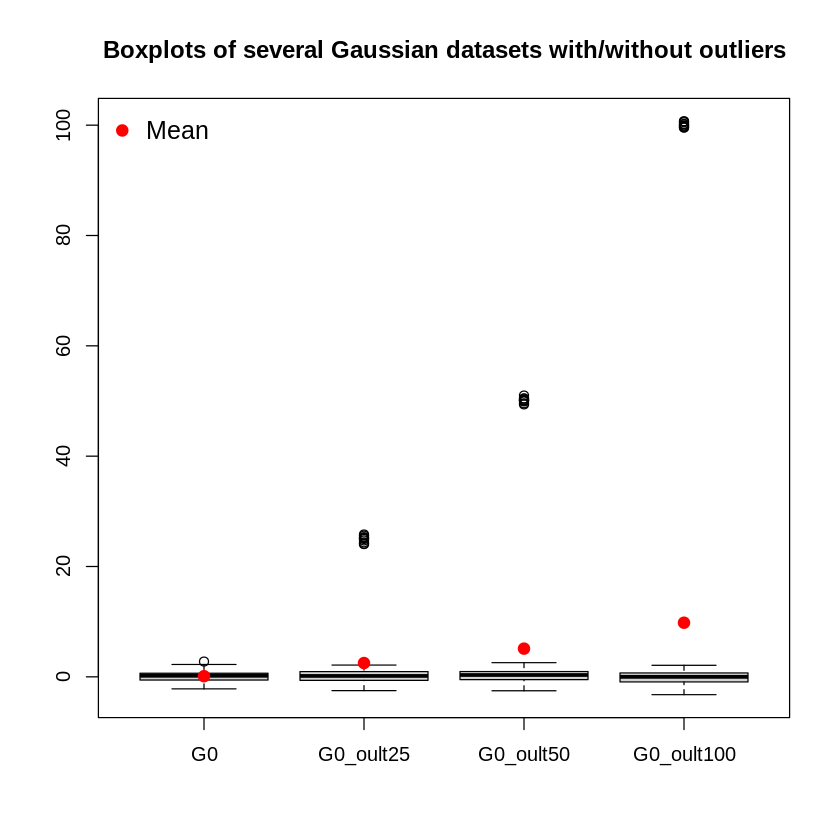

In [9]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
# Add legend
legend("topleft", legend = c("Mean"),
       cex = c(1.25), col = c("red"), bty = "n",
       pch = c(19))

#### **Median**

The **median** is the middle value of an ordered dataset. It divides the data into two equal halves — 50% of the observations lie below the median, and 50% lie above.

- For a dataset of size $n$, sorted in ascending order:
  - If $n$is **odd**, the median is the value at position $\frac{n + 1}{2}$.
  - If $n$ is **even**, the median is the average of the two middle values at positions $\frac{n}{2}$ and $\frac{n}{2} + 1$.

$$
\text{Median}(x_1, \dots, x_n) =
\begin{cases}
x_{\big(\frac{n + 1}{2}\big)}, & \text{if } n \text{ is odd}, \\\\
\frac{1}{2} \left(x_{\big(\frac{n}{2}\big)} + x_{\big(\frac{n}{2} + 1\big)} \right), & \text{if } n \text{ is even},
\end{cases}
$$

where $x_{(1)}, x_{(2)}, \dots, x_{(n)}$ denotes the sorted sample.

####  **Properties of the Median**
- The median is **robust to outliers**.
- It is a more **reliable measure of central tendency** than the mean for skewed distributions or data with outliers.
- Suitable for both **ordinal** and **continuous** data.

To compute the median in R, use the `median()` function. It takes a numeric vector and returns the sample median.


In [10]:
median(X$G0)
median(X$G0_oult25)
median(X$G0_oult50)
median(X$G0_oult100)

[1] 0.1909209

[1] 0.1565388

[1] 0.3309661

[1] -0.003256633

#### **R Examples**

Unlike mean, there is no  `colMedians()` function to compute the medians of all columns in the data frame `X`. However, we can use `apply()` function to repeatedly apply the `median()` function to each of the column in `X`. This is generally more computationally efficient.

In [11]:
print(apply(X, MARGIN = 2, median)) #MARGIN = 2: apply `median()` to all columns

          G0    G0_oult25    G0_oult50   G0_oult100 
 0.190920893  0.156538752  0.330966106 -0.003256633 


The median does not increase as the magnitute of outlying values increases, which is desirable.

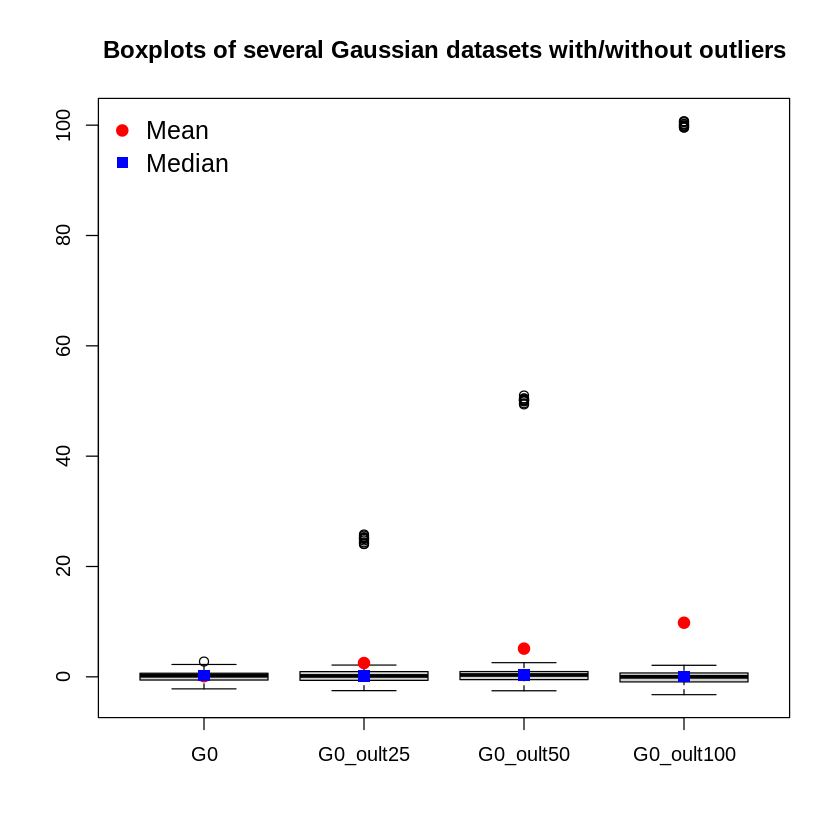

In [12]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
cMedians = apply(X, 2, median)

points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
points(1:4, cMedians, pch = 15, col = "blue", cex = 1.25)

# Add legend
legend("topleft", legend = c("Mean", "Median"),
       cex = rep(1.25, 2), col = c("red", "blue"), bty = "n",
       pch = c(19,15))

While the mean is the most commonly understood measure of average, median measures are most representative of an "average" employee’s earnings as earnings data has a positively skewed distribution. The mean is higher than the median value because of a small number of people with very high earnings.

> While the mean is the most commonly understood measure of average, median measures are most representative of an "average" employee’s earnings as earnings data has a positively skewed distribution. The mean is higher than the median value because of a small number of people with very high earnings.   
See [Australian Bureau of Statistics – Average Earnings Guide](https://www.abs.gov.au/statistics/understanding-statistics/guide-labour-statistics/earnings-guide/average-earnings-guide) for more details.



The figure below is from [Australian Bureau of Statistics – Average Earnings Guide](https://www.abs.gov.au/statistics/understanding-statistics/guide-labour-statistics/earnings-guide/average-earnings-guide), showing the median and average weekly earnings of employees in Australian.

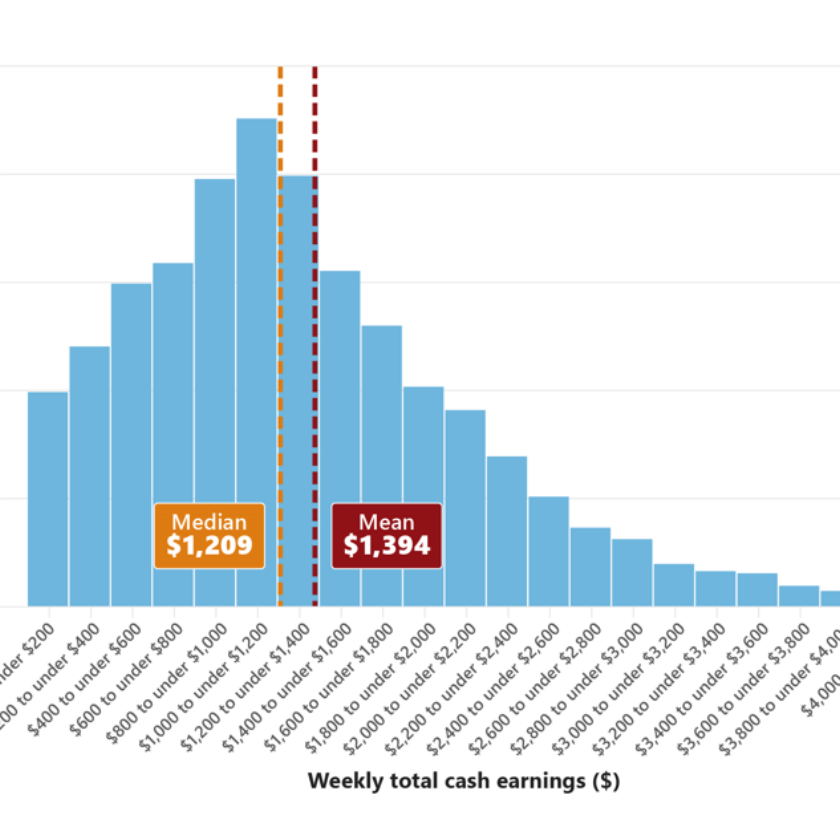

In [13]:

img = readPNG("figures/abs_earning.png")
grid.newpage()
vp = viewport(width = 1.25, height = 1.25)
pushViewport(vp)
grid.raster(img)
popViewport()

#### **Mode**

The **mode** is the value(s) that occur most frequently in a dataset. It represents the *most common* observation(s).

- For a dataset $x_1, x_2, \dots, x_n$, the mode is the value $m$ such that the count of $m$ is greater than or equal to the count of any other value.

Formally, if $f(x)$ is the frequency of value $x$:

$$
\text{Mode} = \arg\max_{x} f(x).
$$

- A dataset can be:
  - **Unimodal**: one unique mode,
  - **Multimodal**: multiple modes,
  - **No mode**: if all values are unique (appear only once).

####  **Properties of the Mode**
- The mode is the only measure of central tendency applicable to **nominal categorical** data.
- For continuous numeric data **without binning or grouping**, the mode is often **not meaningful**, because the probability of observing the exact same value twice in a continuous distribution is effectively **zero**. Essentially, there is **no mode**.
- It is sensitive to the level of data discretisation (binning) but less sensitive to outliers than the sample mean (if data are well-binned).


####  **R Examples**

There is no built-in `mode()` function in R. In R, `mode()` is more or less similar to `typeof()`, which tells us the data type of an R object. We, however, have prepared some useful functions, which help you bin the data and then compute the mode(s).

- `Mode()`: Computes the mode(s) given a numeric vector.
- `FDbinning()`: Bins the data into intervals according to the Freedman–Diaconis (FD) method, which is quite robust to outliers.

We first apply the `Mode()` function to the raw data in column `G0` in the dataset to compute the modes.

In [14]:
modeRawG0 = Mode(X$G0)
print(modeRawG0)

  [1] -2.18403961 -1.94160646 -1.87044621 -1.86213372 -1.71176962 -1.56790161
  [7] -1.40562405 -1.35925383 -1.23483680 -1.14949460 -0.97075634 -0.89685607
 [13] -0.88315144 -0.88233086 -0.84278455 -0.77477858 -0.74667026 -0.71127774
 [19] -0.68322790 -0.67913140 -0.65235349 -0.64270523 -0.64243878 -0.60640249
 [25] -0.59474031 -0.57904945 -0.56990905 -0.51101256 -0.50867348 -0.44414549
 [31] -0.43101142 -0.42635058 -0.37848994 -0.34328172 -0.33196149 -0.23144739
 [37] -0.20947953 -0.16823597 -0.15340914 -0.14773459 -0.13010466 -0.11086000
 [43] -0.03723641  0.03809846  0.06557870  0.07447237  0.11787608  0.12640997
 [49]  0.14632631  0.18255639  0.19928539  0.20215642  0.20623215  0.21535937
 [55]  0.21960435  0.22594259  0.26534791  0.31762673  0.32309346  0.38186852
 [61]  0.38507129  0.38701077  0.40346002  0.40866860  0.44051949  0.44810380
 [67]  0.46283217  0.47644589  0.48536656  0.50407191  0.52180226  0.60374928
 [73]  0.63074678  0.63447044  0.64778106  0.65710310  0.6997982

It returns the vector of mode values, whose length is equal to the number of observations. As every observation is a mode, there is essentially no mode.

In [15]:
length(modeRawG0)

[1] 100

We can use the `FDbinning()` function to bin the data into intervals.

In [16]:
binnedG0 = FDbinning(X$G0)
print(binnedG0)
length(binnedG0)

  [1] (-1.94,-1.41]   (0.719,1.25]    (0.188,0.719]   (1.25,1.78]    
  [5] (1.78,2.31]     (-0.875,-0.343] (-0.875,-0.343] (-1.41,-0.875] 
  [9] (0.719,1.25]    (0.188,0.719]   (1.25,1.78]     (-0.875,-0.343]
 [13] (-0.343,0.188]  (-0.343,0.188]  (-0.343,0.188]  (0.188,0.719]  
 [17] (-1.41,-0.875]  (-1.41,-0.875]  (-0.875,-0.343] (-0.343,0.188] 
 [21] (-1.41,-0.875]  (-0.343,0.188]  (-0.875,-0.343] (1.78,2.31]    
 [25] (0.188,0.719]   (0.719,1.25]    (-0.343,0.188]  (0.719,1.25]   
 [29] (-0.875,-0.343] (-0.343,0.188]  (0.188,0.719]   (0.188,0.719]  
 [33] (-1.41,-0.875]  (-0.875,-0.343] (-0.875,-0.343] (-0.343,0.188] 
 [37] (-0.875,-0.343] (0.188,0.719]   (-0.875,-0.343] (0.188,0.719]  
 [41] (0.719,1.25]    (-0.875,-0.343] (-0.343,0.188]  (1.25,1.78]    
 [45] (-2.47,-1.94]   (0.188,0.719]   (-0.343,0.188]  (0.188,0.719]  
 [49] (-2.47,-1.94]   (-0.875,-0.343] (-1.94,-1.41]   (1.25,1.78]    
 [53] (0.188,0.719]   (-1.41,-0.875]  (-1.41,-0.875]  (0.719,1.25]   
 [57] (0.719,1.25]  

[1] 100

Then, we can compute the most frequent interval using the `Mode()` function.

In [17]:
Mode(binnedG0)

[1] (0.188,0.719]
12 Levels: [-3,-2.47] (-2.47,-1.94] (-1.94,-1.41] ... (2.84,3.38]

#### **Exercise 1**

The most frequent interval in the demonstrated example above is quite close to the central tendency of the data. We are, however, interested in the situations where outliers are present.

Compute the mode of the FD-binned data for the other columns in the data frame X. Then, comment on how the most frequent interval(s) changes as the magnitude of the outlying values increases. Is that sensitive to outliers?

<details>
<summary>▶️ Click to show the solution</summary>

```r
Mode(FDbinning(X$G0_oult25))
Mode(FDbinning(X$G0_oult50))
Mode(FDbinning(X$G0_oult100))
```

</details>

#### **Exercise 2**

We have provided a function named `ModeBinMidpoint()`, which computes the mid-point of the most frequent interval. You can think of that as a function like `mean()` and `median()`, which takes a numeric vector and returns a value.

Use `apply()` to compute `ModeBinMidpoint` for all columns in the data frane `X` and assign the results to the `cModes` variable by modifying the code cell below.

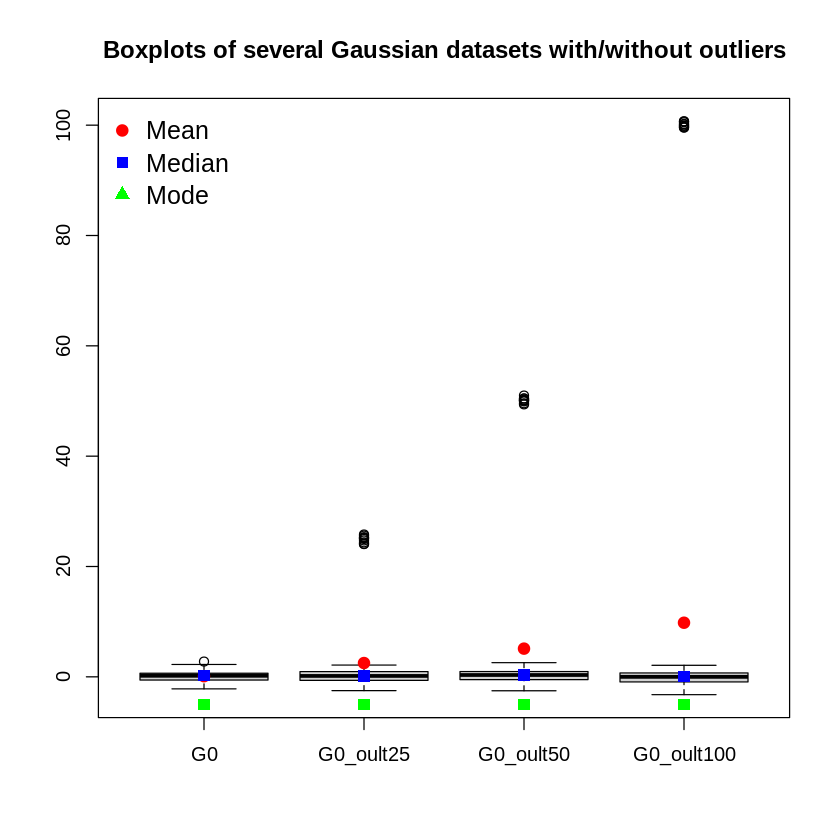

In [19]:
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
cMedians = apply(X, 2, median)
cModes = c(-5,-5,-5,-5) #Modify this line of code

points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
points(1:4, cMedians, pch = 15, col = "blue", cex = 1.25)
points(1:4, cModes, pch = 15, col = "green", cex = 1.25)
# Add legend
legend("topleft", legend = c("Mean", "Median", "Mode"),
       cex = rep(1.25, 3), col = c("red", "blue", "green"), bty = "n",
       pch = c(19,15, 17))

<details>
<summary>▶️ Click to show the solution</summary>

```r
boxplot(X, main = "Boxplots of several Gaussian datasets with/without outliers")

cMeans = colMeans(X)
cMedians = apply(X, 2, median)
cModes = apply(X,2, ModeBinMidpoint)

points(1:4, cMeans, pch = 19, col = "red", cex = 1.25)
points(1:4, cMedians, pch = 15, col = "blue", cex = 1.25)
points(1:4, cModes, pch = 15, col = "green", cex = 1.25)
# Add legend
legend("topleft", legend = c("Mean", "Median", "Mode"),
       cex = rep(1.25, 3), col = c("red", "blue", "green"), bty = "n",
       pch = c(19,15, 17))
```

</details>

## **Measure of Variability**

We use the same dataset as in the previous section.

### **Sample Variance**

Given a sample of observations of size $n$ with sample mean $\bar{x}$, the sample variance is

$$\text{Variance}(x_1, \dots, x_n) \equiv s^2 = \frac{\sum_{i=1}^n(x_i-\bar{x})^2}{n-1}$$.

The variance is basically the average of the squared distance between observations and the sample mean, and as such, it has the advantage of being based on all the observations.

### **Properties of the Sample Variance**

- In the absence of outliers, the sample variance is an efficient and unbiased estimator of the population variance; its accuracy improves as the sample size increases.
- Unfortunately, the sample variance is sensitive to outliers since squaring amplifies the effect of extreme values. Also, it is based on the sample mean, which is not a robust estimator.
- Interpreting the sample variance is difficult as its units are the square of the units for the observations. For example, if $x_i$ is a measurement of time in seconds, then the sample variance $s^2$ is in the units $\text{seconds}^{2}$. Conceptually it is difficult to understand a squared second in terms of the data.

**There are various robust estimators of the population variance, but these are (way) beyond the scope of this unit.**



### **R Examples**
In R, the sample variance can be calculated using the built-in `var()` function. This function takes a numeric vector as input and returns the sample variance.

In [20]:
var(X$G0)
var(X$G0_oult25)
var(X$G0_oult50)
var(X$G0_oult100)

[1] 0.9530613

[1] 57.33893

[1] 228.4473

[1] 915.9539

There is no `colVars()` function in R. However, we can use the `apply()` functions to compute column variances.


In [21]:
print(apply(X, 2, var))

         G0   G0_oult25   G0_oult50  G0_oult100 
  0.9530613  57.3389300 228.4473102 915.9539071 


We observe that the variance increases as the magnitude of the outliers increases—at a rate substantially faster than that of the mean. A *robust* estimate of the sample variance should give us a value close to $1$ **as the non-outlying observations have a variance of $\approx$ 1**.

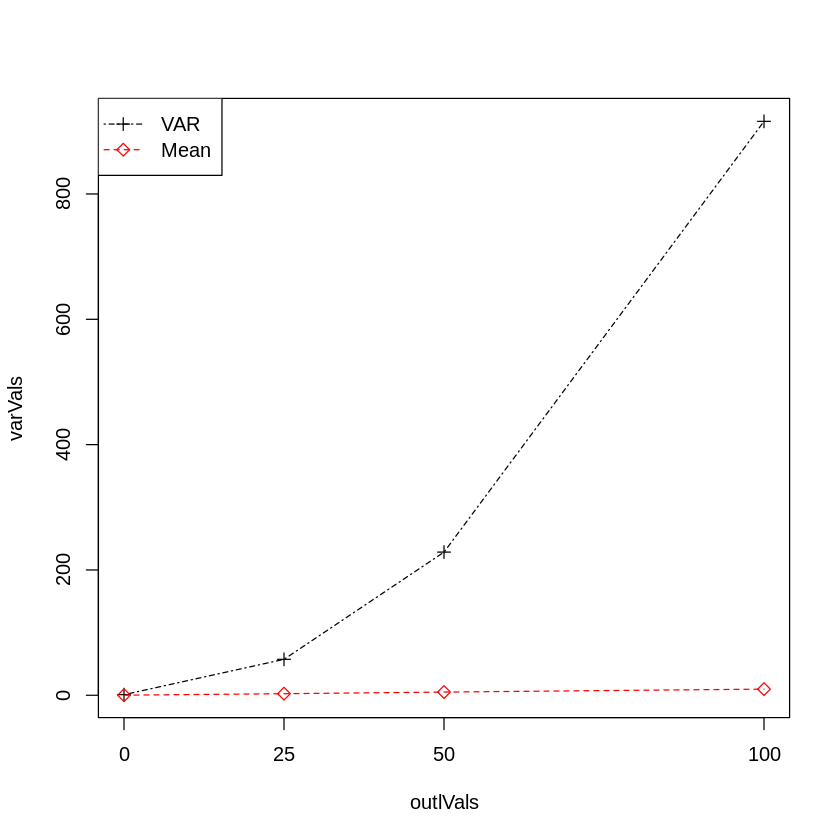

In [22]:
outlVals = c(0,25,50,100)
meanVals = apply(X,2,mean)
varVals = apply(X,2,var)


plot(outlVals, varVals, type = "l", lty = 4, col = "black", xaxt = "n")
points(outlVals, varVals,pch = 3, col = "black")
axis(side = 1, at = c(0, 25, 50, 100))

lines(outlVals, meanVals, type = "l", lty = 2, col = "red")
points(outlVals, meanVals,pch = 5, col = "red")

legend("topleft", legend = c("VAR", "Mean"), pch = c(3,5), col = c("black", "red"), lty = c(4,2))


### **Sample Standard Deviation**

The sample standard deviation is the square root of the sample variance,

$$
\text{Standard Deviation}(x_1, \dots, x_n) \equiv s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n-1}} = \sqrt{s^2}.
$$

### **Properties of the Sample Standard Deviation**

- Unfortunately, the sample variance is sensitive to outliers since squaring amplifies the effect of extreme values. Also, it is based on the sample mean, which is not a robust estimator.
- Interpreting the sample variance is difficult as its units are the square of the units for the observations. For example, if $x_i$ is a measurement of time in seconds, then the sample variance $s^2$ is in the units $\text{seconds}^{2}$. Conceptually it is difficult to understand a squared second in terms of the data.

### **R Examples**
In R, the sample standard deviation can be calculated using the built-in `sd()` function. This function takes a numeric vector as input and returns the sample standard deviation.

In [23]:
sd(X$G0)
sd(X$G0_oult25)
sd(X$G0_oult50)
sd(X$G0_oult100)

[1] 0.9762486

[1] 7.572247

[1] 15.11447

[1] 30.26473

There is no `colSds()` function in R. However, we can use the `apply()` functions to compute column standard deviations.


In [24]:
print(apply(X, 2, sd))

        G0  G0_oult25  G0_oult50 G0_oult100 
 0.9762486  7.5722474 15.1144735 30.2647304 


This figure demonstrates the smaller rate of increase compared to that of the sample variance.

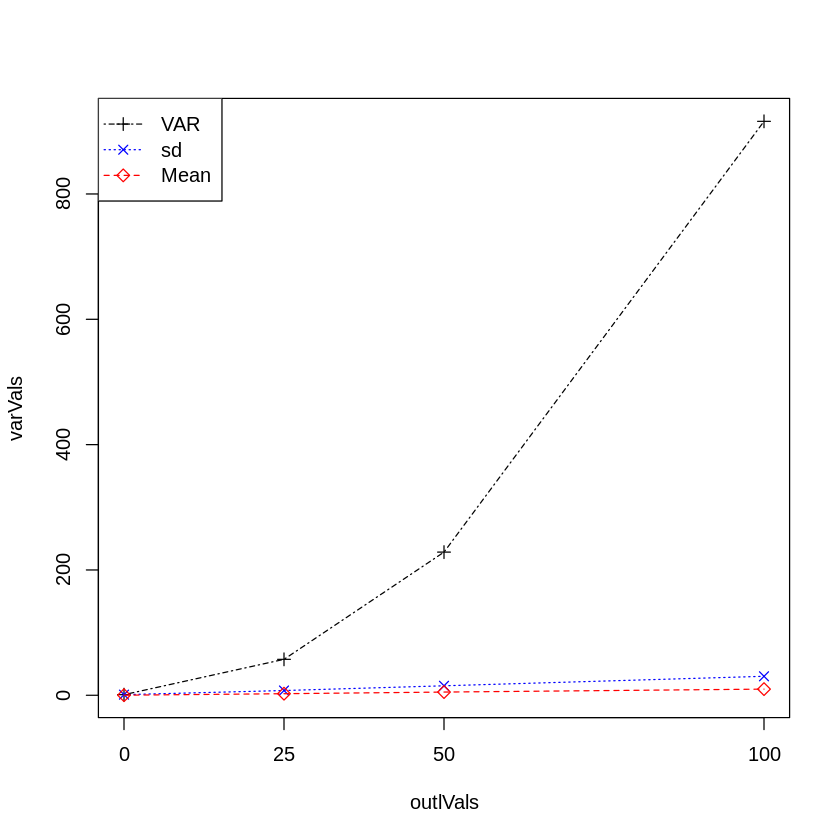

In [25]:
outlVals = c(0,25,50,100)
meanVals = apply(X,2,mean)
varVals = apply(X,2,var)
sdVals = apply(X, 2, sd)


plot(outlVals, varVals, type = "l", lty = 4, col = "black", xaxt = "n")
points(outlVals, varVals,pch = 3, col = "black")
axis(side = 1, at = c(0, 25, 50, 100))

lines(outlVals, sdVals, type = "l", lty = 3, col = "blue", xaxt = "n")
points(outlVals, sdVals,pch = 4, col = "blue")

lines(outlVals, meanVals, type = "l", lty = 2, col = "red")
points(outlVals, meanVals,pch = 5, col = "red")

legend("topleft", legend = c("VAR", "sd", "Mean"), pch = c(3,4,5), col = c("black", "blue", "red"), lty = c(4,3,2))


#### **The Empirical Rule For Interpreting Standard Deviation**

If the data is not severely deviated from being roughly symmetric, unimodal, and not heavy-tailed, then, in general:

- 68% of the observations will fall within one standard deviation of the mean

- 95% of the observations will fall within two standard deviations of the mean

- 99.7% of the observations will fall within three standard deviations of the mean.

These results are connected to the properties of the Gaussian (normal) distribution, which we will study in more detail later. Once you know that the data are  (approximately) generated from a Gaussian distribution, it is safe to use the empirical rule.

The Gaussian distribution has the well-known bell-shaped curve. You’ll often hear people say things like “it follows the curve.” That’s because many people claim that the Gaussian distribution shows up everywhere: exam scores, heights, SATs, measurement errors — so many things in the real world tend to follow this curve, **at least approximately**. This distribution is also very "normal" in the sense that extreme values are exceedingly rare, making it unlikely to observe outliers far from the mean.

**Gaussian Example**

In our first example, we generate data from the standard Gaussian (normal) distribution, which satisfies all the conditions under which the empirical rule holds well.

We have prepared the `empiricalRuleGaussian()` function, which visualises the empirical rule. The function overlays a histogram of the data with a best-fitting bell-shaped curve and highlights the ±1, ±2, and ±3 standard deviation intervals around the mean. It takes a numeric vector as the first argument and the limits of the x-axis as the second argument. By default, the x-axis limits are set to the minimum and maximum of the input vector, but we will specify them explicitly in the code for clarity.

Empirical coverage:
k = 1 (±1 SD): 68.90% of data
k = 2 (±2 SD): 95.05% of data
k = 3 (±3 SD): 99.80% of data


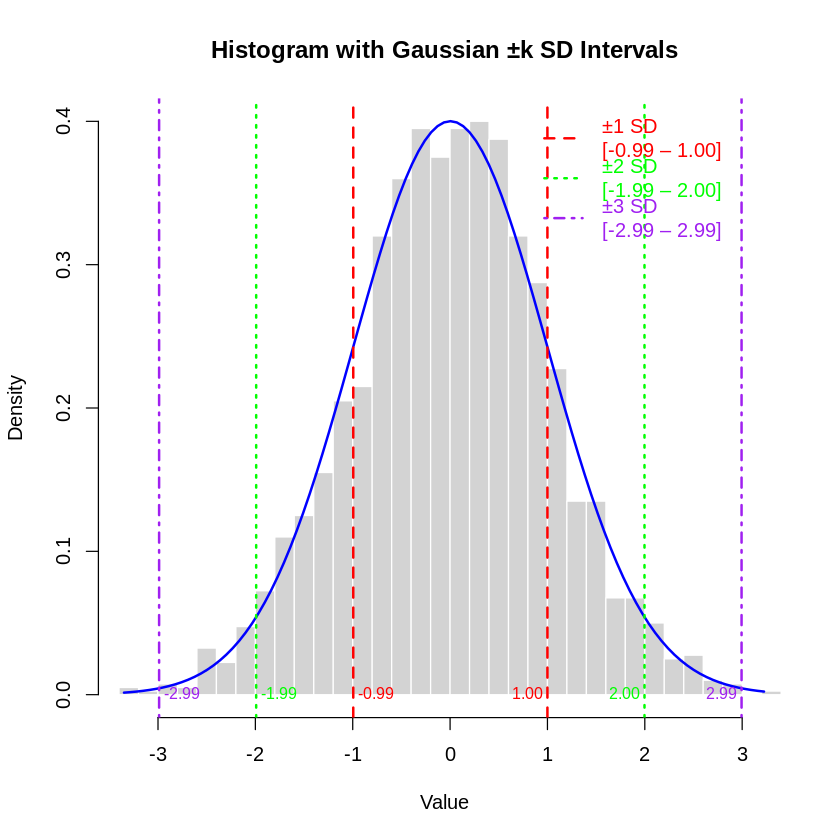

In [26]:
set.seed(59)
data = rnorm(2000)
empiricalRuleGaussian(data, xlim = c(min(data), max(data)))

Based on empirical coverage, the empirical rule is generally accurate here.

**Non-Gaussian, Heavy-Tailed Example**

In the second example, we simulate data from the Student's t-distribution with 2 degrees of freedom. Don’t worry if you’re not familiar with it yet — we’ll explore this distribution in detail later. What’s important now is that the t-distribution with low degrees of freedom is heavy-tailed and symmetric. This means you’re much more likely to see extreme values, both positive and negative, compared to the Gaussian distribution.

For instance, in our simulation, we might observe values as extreme as `-40`, which is practically impossible under a standard Gaussian given the age of the universe and all the computing power on Earth.

Empirical coverage:
k = 1 (±1 SD): 86.15% of data
k = 2 (±2 SD): 95.85% of data
k = 3 (±3 SD): 98.40% of data


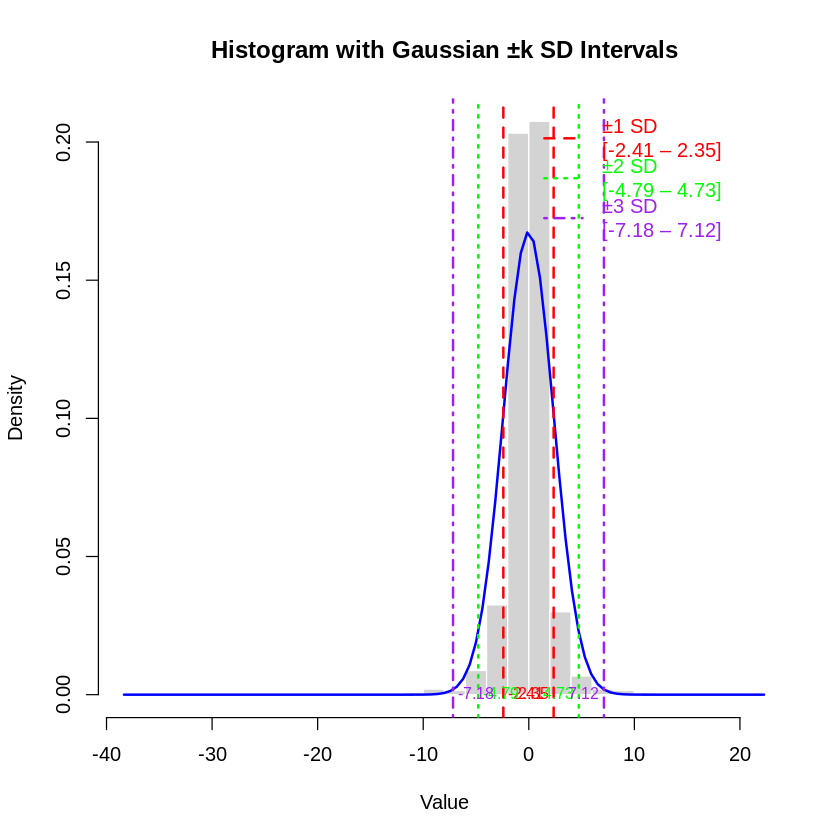

In [27]:
set.seed(59)
data = rt(2000,2)
empiricalRuleGaussian(data, xlim = c(min(data), max(data)))

Based on empirical coverage, the empirical rule is severely violated here.

**Non-Gaussian, Less Heavy-Tailed Example**

In the third example, we simulate data from the Student’s t-distribution with 8 degrees of freedom. This t-distribution is symmetric and less heavy-tailed.

Empirical coverage:
k = 1 (±1 SD): 72.00% of data
k = 2 (±2 SD): 95.25% of data
k = 3 (±3 SD): 98.95% of data


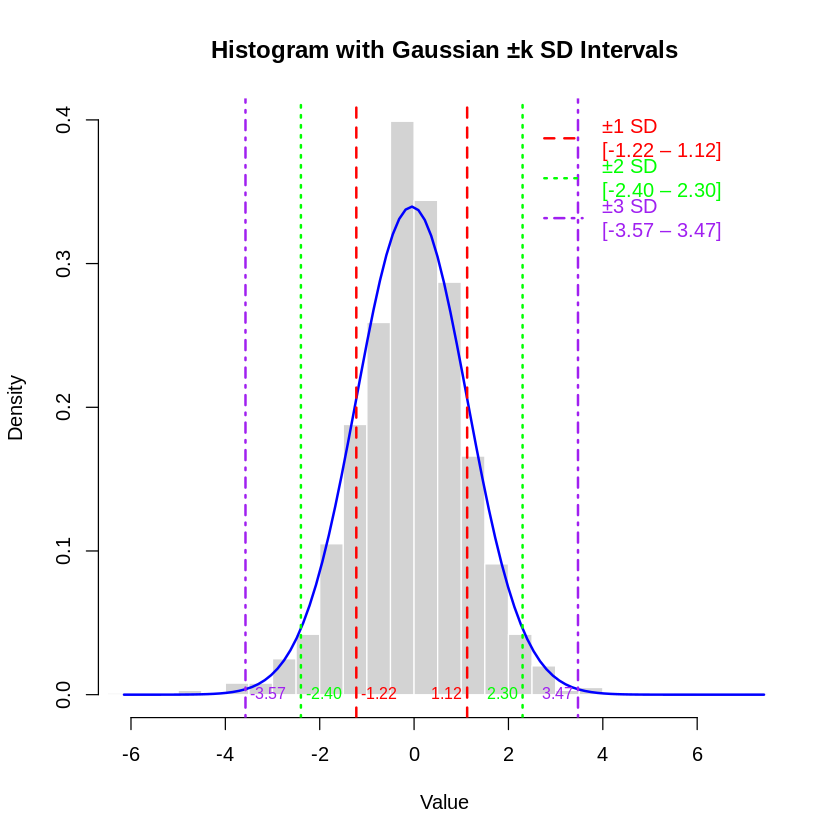

In [28]:
set.seed(59)
data = rt(2000,8)
empiricalRuleGaussian(data, xlim = c(min(data), max(data)))

Based on empirical coverage, the empirical rule is acceptable here.

**Non-Gaussian, Skewed Example**

In our forth example, we simulate data from a strongly skewed exponential distribution. This distribution is not symmetric — it has a long tail on one side — meaning extreme values are much more likely on that side, while most observations cluster near zero. It is also non-negative. Don’t worry if this is unfamiliar now — we’ll explore this distribution later in this unit.

Empirical coverage:
k = 1 (±1 SD): 87.35% of data
k = 2 (±2 SD): 94.75% of data
k = 3 (±3 SD): 97.90% of data


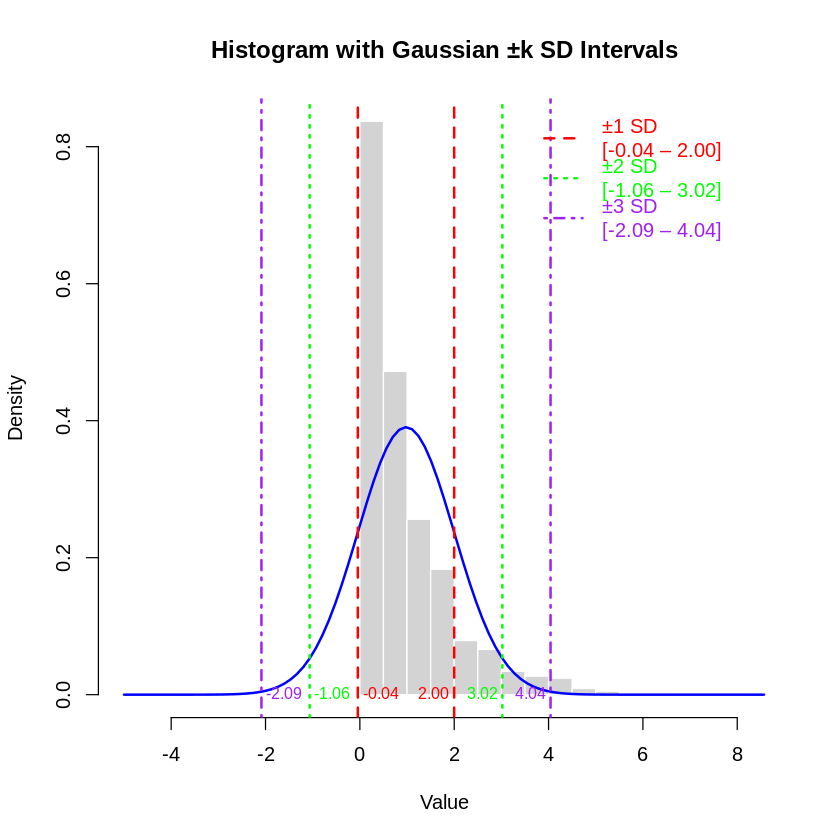

In [54]:
set.seed(59)
data = rexp(2000, rate = 1)  # Exponential, mode near 0, mean=1, skewed
empiricalRuleGaussian(data, c(-5, max(data)))


Based on empirical coverage, the empirical rule is severely violated here. Worse, it also covers the negative domain, which is impossible under our data-generating process.

**Non-Gaussian, Less Skewed Example**  

In the last example, we will apply a log() transformation to the data in the previous example. This transformation tends to make the data more "normal" and less skewed — although some skewness may still remain, you should see an improvement in how well the empirical rule holds.

**FYI**: The log transformation is a very useful tool in many modelling scenarios as it effectively reduces skewness and stabilises variance. Of course, the raw variables must be non-negative, which may require shifting the values by adding a positive constant (e.g., +1) before applying the transformation (e.g., quite frequently, `income = 0`).

Empirical coverage:
k = 1 (±1 SD): 73.05% of data
k = 2 (±2 SD): 94.95% of data
k = 3 (±3 SD): 98.85% of data


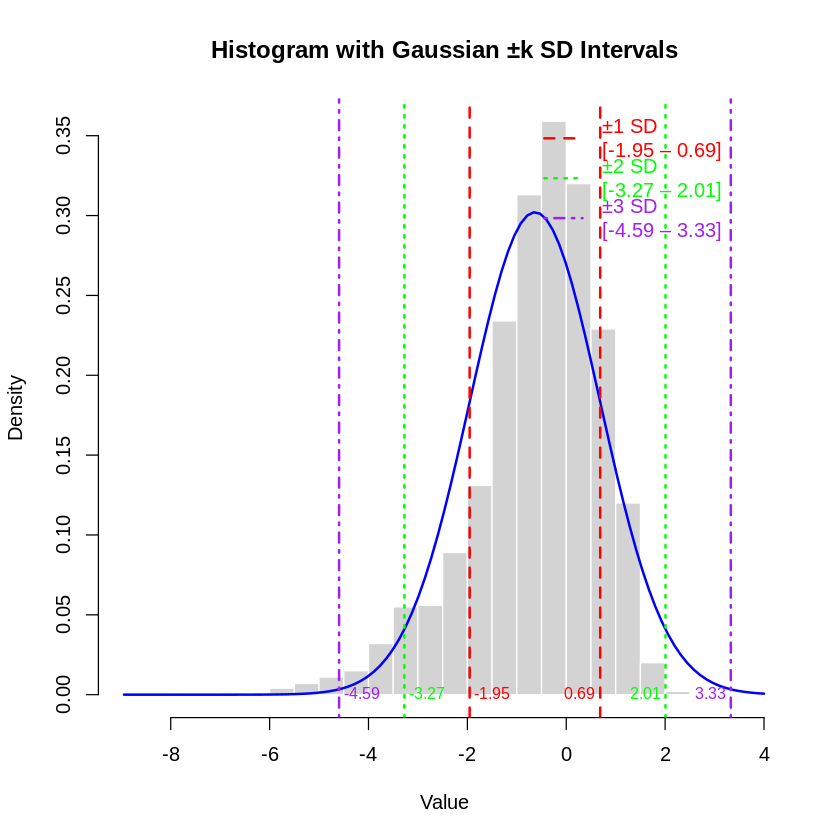

In [30]:
set.seed(59)
data = log(rexp(2000, rate = 1))
empiricalRuleGaussian(data, c(min(data), 4))


Still far from the fitted Gaussian curve, but the empirical rule is generally adequate here.

The empirical rule may still apply to data with outliers, but doing so requires using **robust estimators of the standard deviation, which is beyond the scope of this unit.**

#### **Exercise**


For $k\geq 1$, given $n$ observations, the Chebyshev’s theorem states that:

At least
$$1-\frac{1}{k^2}$$
of the observations will lie within $k$ standard deviations of the mean. Or more formally:

For a sample of size $n$ and $k\geq 1$

$$\frac{\#\{x|\bar{x}-ks<x<\bar{x}+ks\}}{n}\geq 1-\frac{1}{k^2}.$$

We have prepared the `chebyshevRule()` function, which is similar to `empiricalRuleGaussian()`, but visualises the Chebyshev's theorem instead. Repeat the same analysis that we did in the previous section and comment on the results.


In [31]:
#1st example
set.seed(59)
data = rnorm(2000)

<details>
<summary>▶️ Click to show the solution</summary>

```r
set.seed(59)
data = rnorm(2000)
chebyshevRule(data, xlim = c(min(data), max(data)))
```

</details>

In [32]:
#2nd example
set.seed(59)
data = rt(2000,2)

<details>
<summary>▶️ Click to show the solution</summary>

```r
set.seed(59)
data = rt(2000,2)
chebyshevRule(data, xlim = c(min(data), max(data)))
```

</details>

In [33]:
#3rd example
set.seed(59)
data = rt(2000,8)

<details>
<summary>▶️ Click to show the solution</summary>

```r
set.seed(59)
data = rt(2000,8)
chebyshevRule(data, xlim = c(min(data), max(data)))
```

</details>

In [34]:
#4th example
set.seed(59)
data = rexp(2000, rate = 1)

<details>
<summary>▶️ Click to show the solution</summary>

```r
set.seed(59)
data = exp(2000, 1)
chebyshevRule(data, xlim = c(-5, max(data)
```

</details>

Coverage vs. Chebyshev Lower Bound:
k = 1: Empirical = 73.05%, Chebyshev bound = 0.00%
k = 2: Empirical = 94.95%, Chebyshev bound = 75.00%
k = 3: Empirical = 98.85%, Chebyshev bound = 88.89%


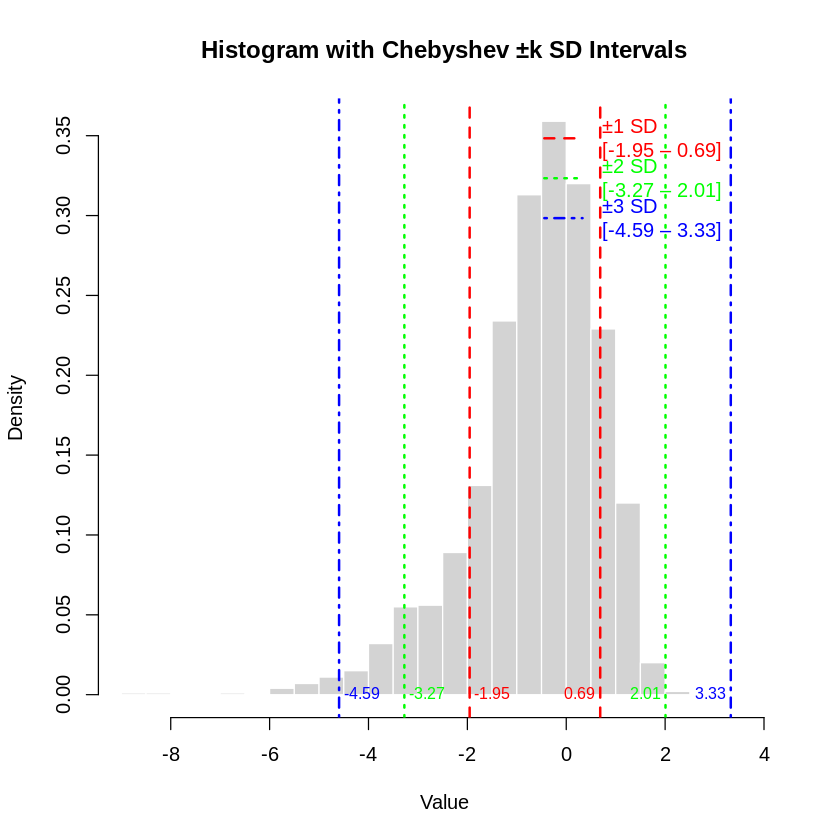

In [55]:
#5th example
set.seed(59)
data = log(rexp(2000, rate = 1))

<details>
<summary>▶️ Click to show the solution</summary>

```r
set.seed(59)
data = log(rexp(2000, rate = 1))
chebyshevRule(data, xlim = c(min(data), 4))
```

</details>

<details>
<summary>▶️ Click to show comments on the results</summary>

Unlike the empirical rule, the Chebyshev's theorem **ALWAYS** holds. However, it only gives a lower-bound and is very conservative (e.g., when $k = 1$, it says at least $0\%$ of the data will be between ±1 SD). It is less powerful than the empirical rule.
</details>

### **Range-based Estimate of Standard Deviation**

Sometimes, you may not have access to the raw values of individual observations — for example, due to privacy concerns — but you still want to estimate the standard deviation of the dataset.

A **rule of thumb** based on a **backward application of the empirical rule** provides a rough approximation of the standard deviation.

The empirical rule tells us that:

- Approximately **95% of the data** in a bell-shaped (Gaussian-like) distribution falls within **±2 standard deviations** of the mean.

So, if we assume that **most of the dataset is contained within ±2 SD**, we can approximate the standard deviation $s$ by:

$$
\tilde{s} = \frac{\text{range}}{4}
$$

where:

- **range** = maximum − minimum value of the dataset.

This is a **crude but often surprisingly effective estimate**, especially when the data are roughly symmetric and not heavily skewed or multimodal.  
However, it becomes a **poor estimate when these assumptions are violated**, as the empirical rule no longer holds well in such cases.


#### **R Examples**

To compute the range-based estimate of standard deviation of `x`, we can simply take `max(x) - min(x)`. We have implemented this estimator in the 'rangeBasedSD()' function, which takes a numeric vector and outputs the range-based estimate of sample standard deviation.

Back to our `X` data frame containing four datasets with increasing magnitude of outlying values.

In [36]:
print(apply(X, 2, rangeBasedSD))
print(apply(X, 2, sd))

        G0  G0_oult25  G0_oult50 G0_oult100 
  1.238019   7.075558  13.379862  25.982400 
        G0  G0_oult25  G0_oult50 G0_oult100 
 0.9762486  7.5722474 15.1144735 30.2647304 


We can see that the range-based estimate deteriorates as the magnitude of outliers increases. However, the scatter plot still remains relatively close to the ideal $y = x$ line. Is this method useful? Yes and No:
- Yes, because it gives a good estimate of the correct sample standard deviation,
- No, because the estimate is still heavily influenced by outliers. A robust estimat should give us a value close to 1 **as the non-outlying observations have a standard deviation of $\approx$ 1**.


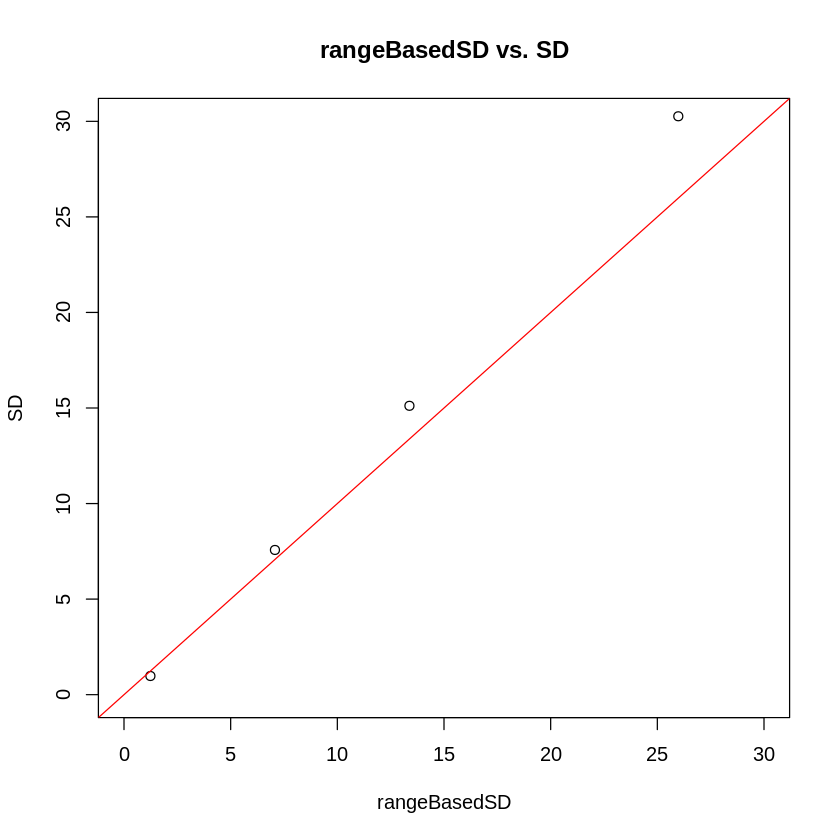

In [37]:
plot(apply(X, 2, rangeBasedSD), apply(X, 2, sd),
     xlab = "rangeBasedSD", ylab = "SD", main = "rangeBasedSD vs. SD",
     xlim = c(0,30), ylim = c(0,30))
abline(a = 0, b= 1, col = "red")

### **Quantiles and the Interquartile Range (IQR)**


For a set of $n$ observations $x_1,x_2,\dots,x_n$, $x_q$ is the q$th$ quantile if q$\%$ of the observations are less than $x_q$. Common quantiles include:

- **The median** — the value below which 50% of the data fall.
- **Quartiles**: Divide data into four equal parts.
  - **Q1 (25th percentile)**: The value below which 25% of the data fall.
  - **Q2 (50th percentile)**: The median.
  - **Q3 (75th percentile)**: The value below which 75% of the data fall.

#### **The Inter-Quartile Range (IQR)**

The interquartile range (IQR) is the distance between the 25$th$ and the 75$th$ quantiles, or the range covering the “middle” 50% of the data. The IQR is sometimes used as a robust measure of dispersion because it isn’t affected by extreme values, unlike the range or the variance.

$$
\text{IQR} = Q_3 - Q_1
$$



#### **R Examples**

To compute quantiles of a numeric vector in **R**, we can use the `quantile()` function, which requires the input vector and the desired quantile level(s). For example, `quantile(x, probs = 0.75)` returns the 75th percentile of the vector `x`.


In [38]:
quantile(X$G0, 0.5)
median(X$G0)

50% 
0.1909209

[1] 0.1909209

If you want to compute the $75\%$ quantiles of all columns in the data frame `X` using `apply()`, things become a bit more complicated now.

The function `apply(X, MARGIN, FUN)` expects a function object as its third argument. This is why passing function names like `mean`, `median`, or `sd` directly works — because those are already defined as functions in R.
However, if you try something like `quantile(probs = 0.75)`, R throws an error. That’s because `quantile(probs = 0.75)` is **NOT** a function — it’s trying to immediately evaluate quantile() without being given any data input.

To fix this, you need to explicitly define an anonymous function that takes one argument, and passes it to `quantile()` along with your desired parameter. For example:

In [39]:
class(mean)
class(function(arg) quantile(arg, probs = 0.75))

print(apply(X,2,function(arg) quantile(arg, probs = 0.75)))

[1] "function"

[1] "function"

        G0  G0_oult25  G0_oult50 G0_oult100 
 0.6501116  0.9435308  0.9389126  0.6947033 


#### **Exercise**

Assign the vectorised evaluation of the 75$th$ percentiles of the columns in `X` (using `apply()`, as shown above) to a variable named `q75`. This will produce a numeric vector.

Repeat the same process to calculate the 25$th$ percentiles of the columns in `X`, and assign the result to a variable named `q25`.

Then, using a simple vector operation to compute the interquartile ranges (IQRs) for all columns in `X`.


<details>
<summary>▶️ Click to show the solution</summary>

```r
q75 = apply(X,2,function(arg) quantile(arg, probs = 0.75))
q25 = apply(X,2,function(arg) quantile(arg, probs = 0.25))
iqr = q75 - q25
print(iqr)
```

</details>


#### **IQR-Based Estimate of Standard Deviation**

For data that is approximately normally distributed, the standard deviation $\sigma$ can be estimated from the IQR using the relation:

$$
\hat{s} \approx \frac{\text{IQR}}{1.349}
$$

This is because, in a normal distribution, the IQR covers approximately 1.349 standard deviations.

We have implemented this estimator in the `IQRBasedSD()` function, which takes a numeric vector and returns an IQR-based estimate of sample standard deviation.

In [41]:
print(apply(X, 2, IQRBasedSD))
print(apply(X, 2, sd))

        G0  G0_oult25  G0_oult50 G0_oult100 
 0.9140725  1.1711543  1.0716763  1.1943617 
        G0  G0_oult25  G0_oult50 G0_oult100 
 0.9762486  7.5722474 15.1144735 30.2647304 


The IQR-based estimates are close to 1, so this method is more robust to outliers than `rangeBasedSD()` and `sd()`. Like the median, this method is generally not affected by the magnitude of outliers. At least, in our example, only at most $10\%$ of each dataset are outliers, so IQR is quite a robust variability measure.

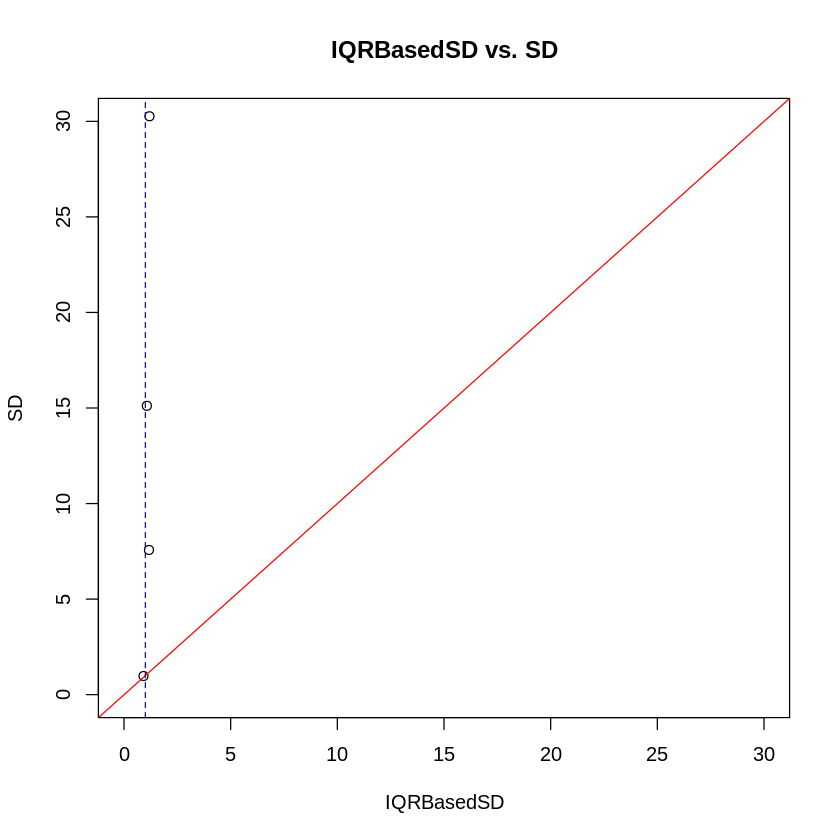

In [42]:
plot(apply(X, 2, IQRBasedSD), apply(X, 2, sd),
     xlab = "IQRBasedSD", ylab = "SD", main = "IQRBasedSD vs. SD",
     xlim = c(0,30), ylim = c(0,30))
abline(a = 0, b= 1, col = "red")
abline(v = 1, lty = 2, col = "blue")

## **Measure of Shape**

While measures of central tendency (like the mean and median) and variability (like the variance and standard deviation) describe the location and spread of a distribution, **measures of shape** provide insight into the distribution's symmetry and tail behavior.


### **Sample Skewness**

Skewness quantifies the **asymmetry** of the distribution. The sample skewness is defined as:

$$
\text{Skewness}(x_1,x_2,...,x_n) = \frac{1}{n} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^3
$$

- A skewness near $0$ indicates that the data are approximately symmetric.
- A **positive skew** (right-skewed) indicates a longer or fatter tail on the right.
- A **negative skew** (left-skewed) indicates a longer or fatter tail on the left.

Skewness is useful for detecting departures from symmetry that may affect modeling assumptions, especially for techniques assuming normality.

#### **R Examples**


We first import `skewed.csv`, which contains several datasets exhibiting increasing levels of skewness.

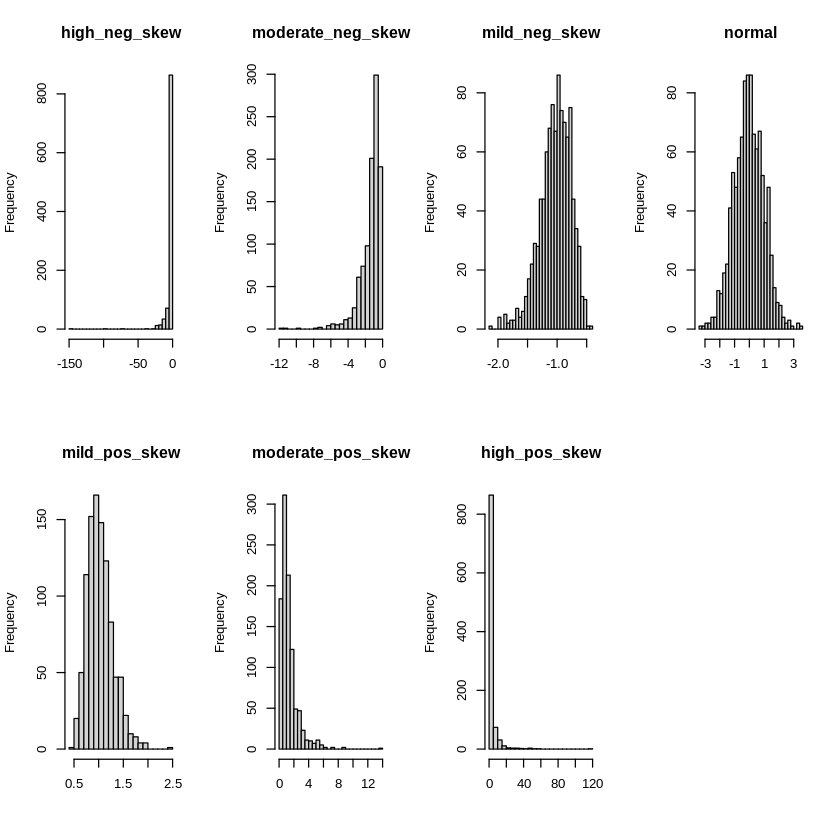

In [43]:
skewed = read.csv("datasets/skewed.csv")
par(mfrow = c(2,4))
for(i in 1:7){hist(skewed[,i], xlab = "", main = colnames(skewed)[i], breaks = 25)}
par(mfrow = c(1,1))

There is no `skewness()` function in base R. However, we have prepared `skewness()` function, which takes a numeric vector and return the sample skewness.

In [44]:
print(apply(skewed,2,skewness))

    high_neg_skew moderate_neg_skew     mild_neg_skew            normal 
     -11.83574644       -2.90955087       -0.67744176       -0.00377292 
    mild_pos_skew moderate_pos_skew     high_pos_skew 
       0.80501122        3.04197061        8.09049573 


In practice, positive skewness is more commonly observed than negative skewness. For example, the previously seen weekly earnings data exhibit positive skewness.

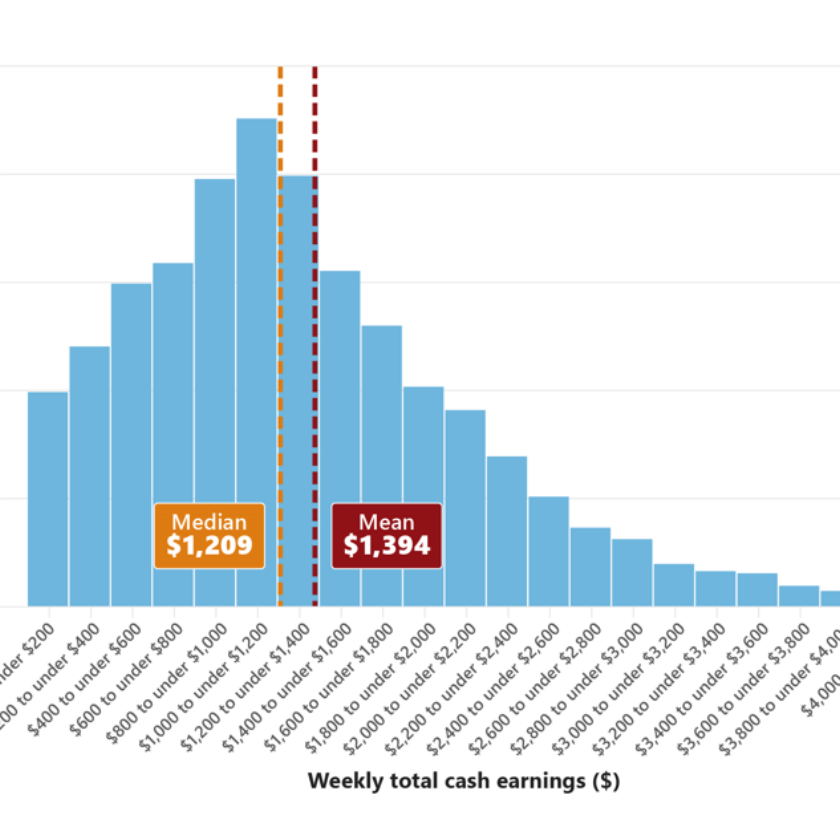

In [45]:

img = readPNG("figures/abs_earning.png")
grid.newpage()
vp = viewport(width = 1.25, height = 1.25)
pushViewport(vp)
grid.raster(img)
popViewport()

#### **Exercise**

Provide a real-world example that exhibits negative skewness.


<details>
<summary>▶️ Click to show the solution</summary>

It would be quite concerning if the age at death were positively skewed—that is, if most people died young and only a few lived to an old age.

</details>

### **Sample Kurtosis**

Kurtosis measures the **tailedness** of the distribution — how prone it is to producing extreme values. The sample kurtosis is given by:

$$
\text{Kurtosis}(x_1,x_2,...,x_n) = \frac{1}{n} \sum_{i=1}^n \left( \frac{x_i - \bar{x}}{s} \right)^4
$$

- For normally distributed data, this value is approximately $3$.
- **Excess kurtosis** is defined as:

$$
\text{Excess Kurtosis} = \text{Kurtosis} - 3
$$

- A positive excess kurtosis ( > 0 ) indicates **heavy tails** (more prone to extreme values).
- A negative excess kurtosis ( < 0 ) indicates **light tails** (fewer extreme values).
- For normally distributed data, this value is approximately $0$.

Kurtosis helps diagnose whether standard deviation is a reliable measure of spread or whether extreme values dominate the variability.


#### **R Examples**
We first import `kurtotic.csv`, which contains three datasets exhibiting different levels or "tailedness".

There is no `kurtosis()` function in base R. However, we have prepared `kurtosis()` function, which takes a numeric vector and return the sample excess kurtosis.

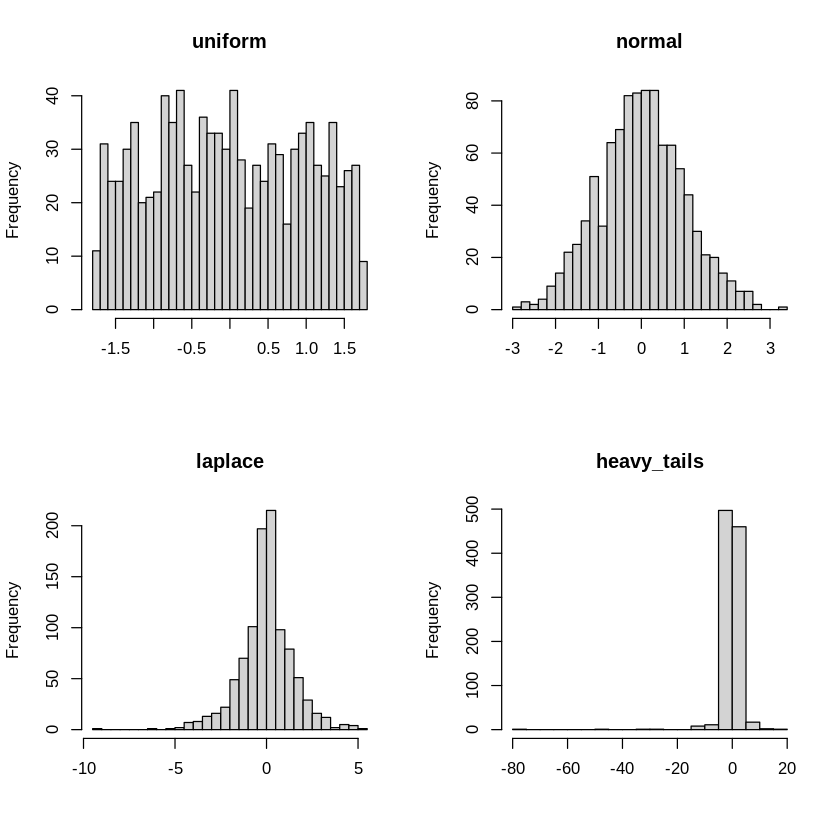

In [46]:
kurtotic = read.csv("datasets/kurtotic.csv")
par(mfrow = c(2,2))
for(i in 1:4){hist(kurtotic[,i], xlab = "", main = colnames(kurtotic)[i], breaks = 25)}
par(mfrow = c(1,1))

In [47]:
print(apply(kurtotic,2,kurtosis))

     uniform       normal      laplace  heavy_tails 
 -1.15508091  -0.06860197   2.96959377 201.84122327 


#### **Exercise**

The following code cell loads the `s&p500.csv` dataset for daily returns of `S&P 500` index from `03/01/2000` to `18/07/2025`, queried from Yahoo Finance, then plots the histogram of daily returns of `S&P 500` and calculates the excess kurtosis.

Comment on the results.

[1] 10.40596

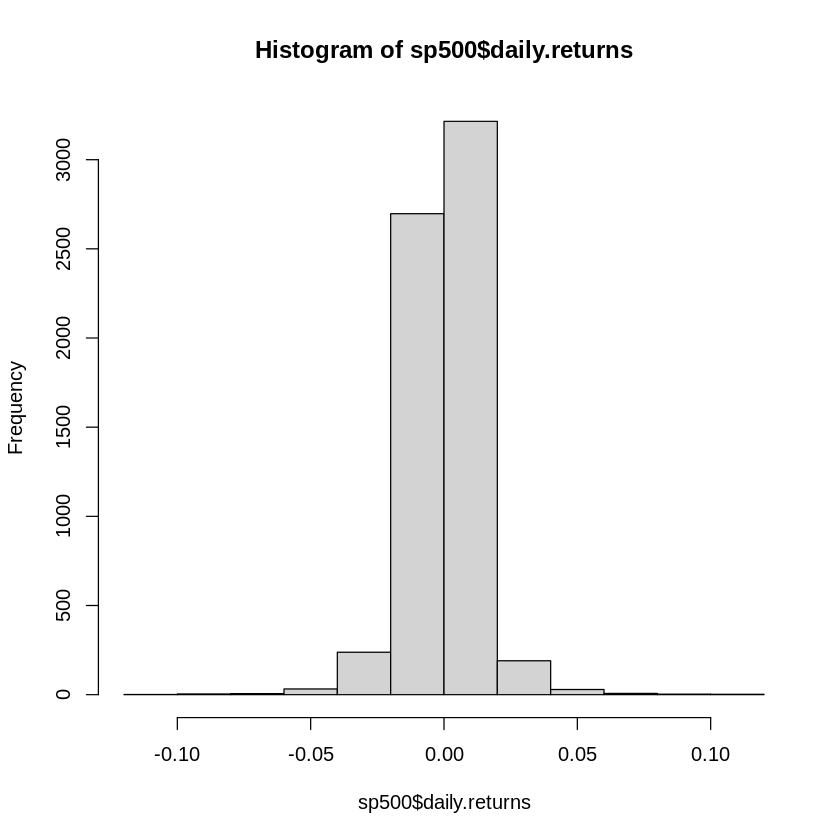

In [48]:
sp500 = read.csv("datasets/s&p500.csv")
hist(sp500$daily.returns)
kurtosis(sp500$daily.returns)

<details>
<summary>▶️ Click to show the solution</summary>

Daily return data are heavy-tailed, not normally distributed. Modelling daily returns as being normally distributed will severely underestimate the risk.

In the 2008 financial crisis, many quantitative models failed to predict the magnitude of losses during the crisis because they **assumed normality**, ignoring the **true fat-tailed nature** of financial returns.

</details>

## **Boxplot**

### **What Does a Boxplot Tell Us?**

We used boxplots in previous examples, but we have not described what exactly a boxplot tells you.

A boxplot displays:
- The **median** (central line),
- The **interquartile range (IQR)** between Q1 and Q3 (the box),
- The **whiskers**, which extend to the most extreme data points within 1.5$\times$IQR from the quartiles,
- And **outliers**, plotted as points beyond the whiskers.

We have prepared the `boxplotDescribe()` function to visualise this.

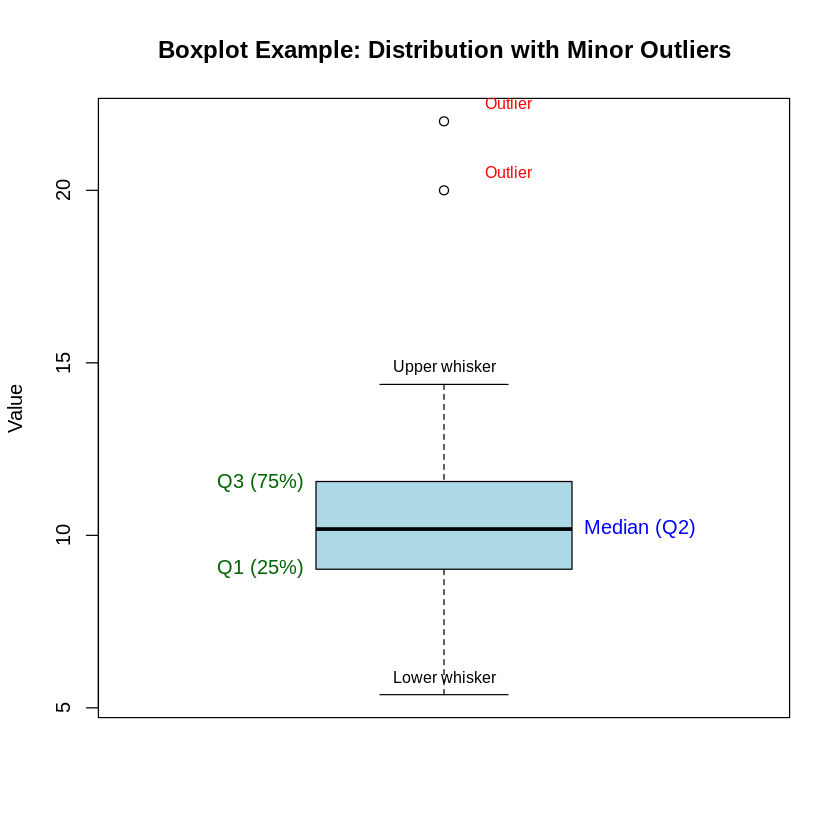

In [49]:
boxPlotDescribe()

We have demonstrated how to create boxplots in base R using the boxplot() function.
- If you input a numeric vector, it creates a single boxplot.
- If you input a data frame or matrix, it creates boxplots for each column, allowing you to compare their distributions side by side.

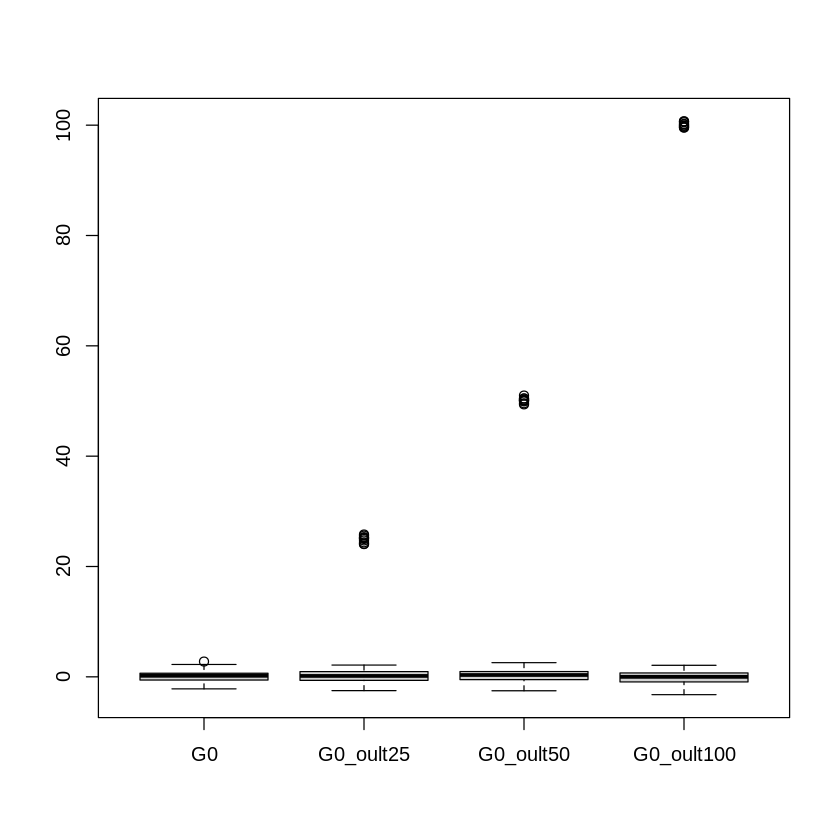

In [50]:
boxplot(X)

### **Create A Boxplot in `ggplot2`**

#### **A Single Boxplot**


Crreating a single boxplot for a numeric vector using `ggplot2` is simple. You only need to convert the numeric vector to a data frame before passing it into the `ggplot()` function.

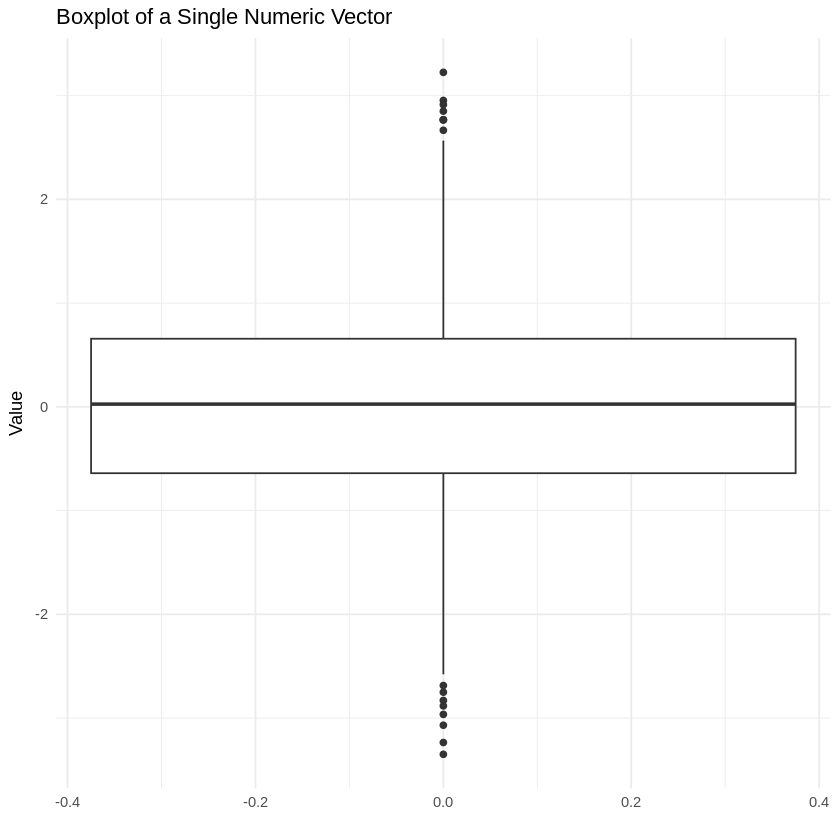

In [51]:
set.seed(59)
numVec = rnorm(2000)
data = data.frame(Value = numVec)

data %>% ggplot(aes(y = Value)) +  # empty x to get a single boxplot
  geom_boxplot() +
  labs(title = "Boxplot of a Single Numeric Vector", x = "", y = "Value") +
  theme_minimal()

#### **Multiple Boxplots**

Creating multiple boxplots with **ggplot2** is relatively more involved than with base R. One key difference is how **ggplot2** handles data:

In `ggplot2`, the **y-axis** represents the values of a single variable. If your data frame has **multiple columns** (e.g., multiple numeric variables), you **cannot** directly plot them all in one call using:

```r
ggplot(data, aes(y = c("col1", "col2")))
```

This simply does not work. The solution is to use long-format data.

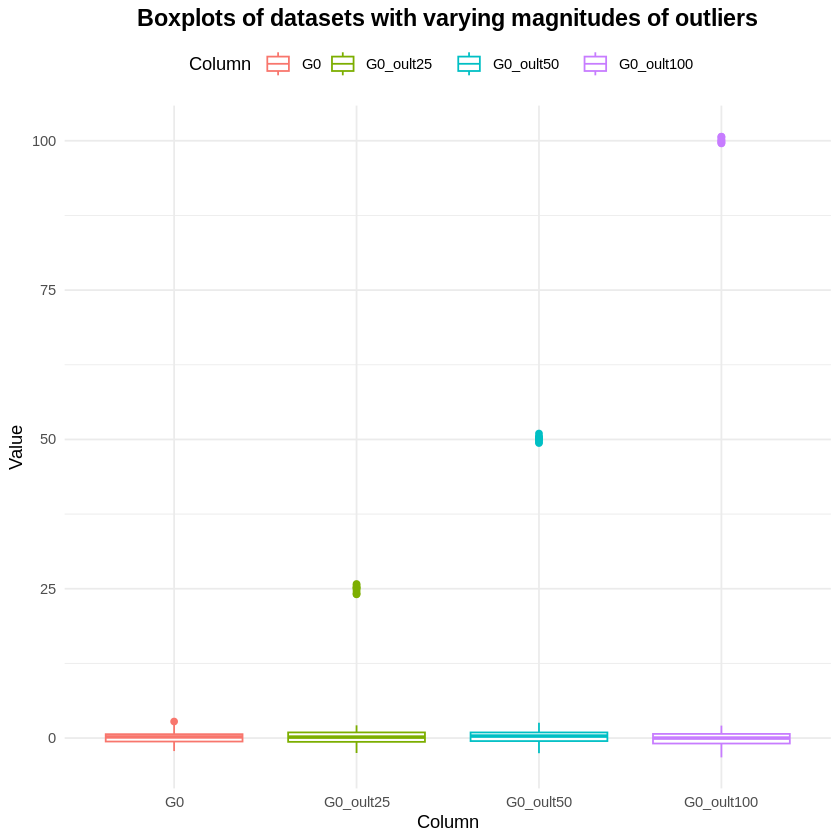

In [52]:
X %>%
  pivot_longer(cols = everything(),
               names_to = "Dataset",
               values_to = "Value") %>%
  mutate(Dataset = factor(Dataset, levels = colnames(X))) -> longX #This is to preserved the column orders in the original dataframe `X`
  #instead of sorting alphabetically.

longX %>% ggplot(aes(x = Dataset, y = Value, color = Dataset)) +
                 geom_boxplot() +
                 labs(
                      title = "Boxplots of datasets with varying magnitudes of outliers",
                      x = "Column", y = "Value", color = "Column"
                      ) +
                 theme_minimal() +
                 theme(
                       plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
                       legend.position = "top"
                 )



#### **Exercise**

Add **ONE** line of code to the following code cell to create boxplots of columns in `skewed` data.frame.

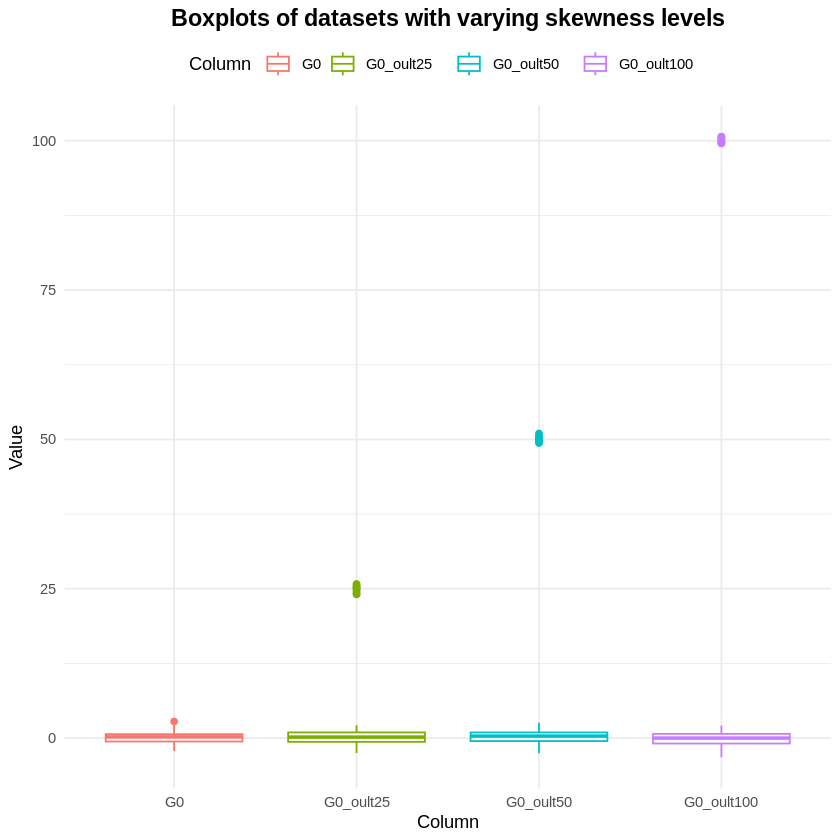

In [53]:
X %>%
  pivot_longer(cols = everything(), #In this example, all columns are numeric, and we are supposed to create boxplots of all columns,
               #use the everything() option.
               names_to = "Dataset",
               values_to = "Value") %>%
  #This is to preserved the column orders in the original dataframe `X` instead of sorting alphabetically.
  mutate(Dataset = factor(Dataset, levels = colnames(X))) -> longX

longX %>% ggplot(aes(x = Dataset, y = Value, color = Dataset)) +
                 geom_boxplot() +
                 labs(
                      title = "Boxplots of datasets with varying skewness levels",
                      x = "Column", y = "Value", color = "Column"
                      ) +
                 theme_minimal() +
                 theme(
                       plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
                       legend.position = "top"
                 )



<details>
<summary>▶️ Click to show the solution</summary>
X = skewed
X %>%
  pivot_longer(cols = everything(),
               names_to = "Dataset",
               values_to = "Value") %>%
  mutate(Dataset = factor(Dataset, levels = colnames(X))) -> longX #This is to preserved the column orders in the original dataframe `X`
  #instead of sorting alphabetically.
  
longX %>% ggplot(aes(x = Dataset, y = Value, color = Dataset)) +
                 geom_boxplot() +
                 labs(
                      title = "Boxplots of datasets with varying skewness levels",
                      x = "Column", y = "Value", color = "Column"
                      ) +
                 theme_minimal() +
                 theme(
                       plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
                       legend.position = "top"
                 )

  
</details>